In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ak-reviews/Reviews.csv


In [7]:
!pip install scikit-learn vaderSentiment ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 28.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 49.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 57.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 4.3 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.0 MB/s eta 0:00:00:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 33.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ...

In [8]:
!pip install tensorflow==2.15.0
!pip install ktrain
!pip install torch==2.4.1
!pip install tensorflow==2.15.0
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.4 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 20.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 14.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.2
    Uninstalling ml-dtypes-0.3.2:
      Successfully uninstalled ml-dtypes-0.3.2
  Attempting uninstall: keras
    Found existing installation: keras 3.6.0
    Uninstallin

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import ktrain, time
from ktrain import text
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/local/lib/python3.10/site-packages/torch_xla/__init__.py:202: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(


In [10]:
# Load data
df = pd.read_csv(r'/kaggle/input/ak-reviews/Reviews.csv').head(5000)
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
4995,4996,B00653KJ5M,AGE64SY3HP9RV,CZ,1,1,2,1341273600,The cavemen must have been wealthy,I really wanted to like these.<br /><br />Firs...
4996,4997,B00653KJ5M,A1MPEPNJ2NKWM,Rachel Albert Matesz,1,1,1,1341100800,These cookies need work; you can make your own...,I was not impressed with these cookies when I ...
4997,4998,B00653KJ5M,A1T6I625FGQS20,IL,1,1,3,1336694400,Okay in a pinch - not great,The cookies came sealed and seem to be high qu...
4998,4999,B00653KJ5M,A3POAWC2JPQQQP,me,0,0,4,1342137600,"they are good (except for the ""rainforest"" fla...","These taste very good, but aren't like the BES..."


In [11]:
# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [12]:
# Calculate sentiment scores
df['sentiment_compound_polarity'] = df['Text'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['sentiment_type'] = df['sentiment_compound_polarity'].apply(lambda x: 'POSITIVE' if x > 0 else ('NEGATIVE' if x < 0 else 'NEUTRAL'))

In [13]:
# Text cleaning function
def text_clean(text):
    text = text.lower().replace("&#039;", "").replace(r'[^\w\d\s]', ' ')
    text = text.replace(r'[^\x00-\x7F]+', ' ').replace(r'^\s+|\s+?$', '')
    text = text.replace(r'\s+', ' ').replace(r'\.{2,}', ' ')
    return text

In [14]:
# Clean text data
df['text_clean'] = df['Text'].apply(text_clean)
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment_compound_polarity,sentiment_type,text_clean
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.9441,POSITIVE,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.5664,NEGATIVE,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.8138,POSITIVE,this is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.4404,POSITIVE,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.9468,POSITIVE,great taffy at a great price. there was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,B00653KJ5M,AGE64SY3HP9RV,CZ,1,1,2,1341273600,The cavemen must have been wealthy,I really wanted to like these.<br /><br />Firs...,0.7206,POSITIVE,i really wanted to like these.<br /><br />firs...
4996,4997,B00653KJ5M,A1MPEPNJ2NKWM,Rachel Albert Matesz,1,1,1,1341100800,These cookies need work; you can make your own...,I was not impressed with these cookies when I ...,0.9846,POSITIVE,i was not impressed with these cookies when i ...
4997,4998,B00653KJ5M,A1T6I625FGQS20,IL,1,1,3,1336694400,Okay in a pinch - not great,The cookies came sealed and seem to be high qu...,0.8554,POSITIVE,the cookies came sealed and seem to be high qu...
4998,4999,B00653KJ5M,A3POAWC2JPQQQP,me,0,0,4,1342137600,"they are good (except for the ""rainforest"" fla...","These taste very good, but aren't like the BES...",0.9826,POSITIVE,"these taste very good, but aren't like the bes..."


In [15]:
# Filter out neutral sentiments
df = df[df['sentiment_type'] != 'NEUTRAL']
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment_compound_polarity,sentiment_type,text_clean
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.9441,POSITIVE,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.5664,NEGATIVE,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.8138,POSITIVE,this is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.4404,POSITIVE,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.9468,POSITIVE,great taffy at a great price. there was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,B00653KJ5M,AGE64SY3HP9RV,CZ,1,1,2,1341273600,The cavemen must have been wealthy,I really wanted to like these.<br /><br />Firs...,0.7206,POSITIVE,i really wanted to like these.<br /><br />firs...
4996,4997,B00653KJ5M,A1MPEPNJ2NKWM,Rachel Albert Matesz,1,1,1,1341100800,These cookies need work; you can make your own...,I was not impressed with these cookies when I ...,0.9846,POSITIVE,i was not impressed with these cookies when i ...
4997,4998,B00653KJ5M,A1T6I625FGQS20,IL,1,1,3,1336694400,Okay in a pinch - not great,The cookies came sealed and seem to be high qu...,0.8554,POSITIVE,the cookies came sealed and seem to be high qu...
4998,4999,B00653KJ5M,A3POAWC2JPQQQP,me,0,0,4,1342137600,"they are good (except for the ""rainforest"" fla...","These taste very good, but aren't like the BES...",0.9826,POSITIVE,"these taste very good, but aren't like the bes..."


In [16]:
# Encode sentiment types
le = LabelEncoder()
df['sentiment_type'] = le.fit_transform(df['sentiment_type'])
# class_names = le.classes_
class_names = le.classes_.tolist()
class_names

/tmp/ipykernel_13/1914243992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_type'] = le.fit_transform(df['sentiment_type'])


['NEGATIVE', 'POSITIVE']

In [17]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(df['text_clean'], df['sentiment_type'], stratify=df['sentiment_type'], test_size=0.3, random_state=42)

In [18]:
# Preprocess data using BERT mode
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_array(
    x_train=x_train.tolist(), y_train=y_train.tolist(),
    x_test=x_test.tolist(), y_test=y_test.tolist(),
    class_names=class_names,
    preprocess_mode='bert',
    maxlen=128
)

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


In [19]:
# Create and compile the BERT model
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 128


/usr/local/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [20]:
# Create a learner object
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test), batch_size=6)

In [21]:
# Train the model
learner.fit_onecycle(2e-5, 2)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/2
575/575 [==============================] - 784s 1s/step - loss: 0.2941 - accuracy: 0.8805 - val_loss: 0.1747 - val_accuracy: 0.9249
Epoch 2/2
575/575 [==============================] - 753s 1s/step - loss: 0.1579 - accuracy: 0.9394 - val_loss: 0.1727 - val_accuracy: 0.9297


In [22]:
# Validate the model
learner.validate(val_data=(x_test, y_test), class_names=class_names)

47/47 [==============================] - 57s 1s/step
              precision    recall  f1-score   support

    NEGATIVE       0.75      0.50      0.60       155
    POSITIVE       0.94      0.98      0.96      1324

    accuracy                           0.93      1479
   macro avg       0.85      0.74      0.78      1479
weighted avg       0.92      0.93      0.92      1479



array([[  77,   78],
       [  26, 1298]])

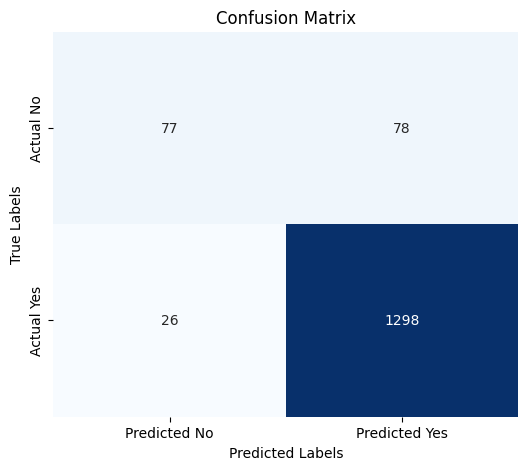

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the confusion matrix
cm = np.array([[77, 78],
               [26, 1298]])

# Create the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Predicted No", "Predicted Yes"], 
            yticklabels=["Actual No", "Actual Yes"])

# Add labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [23]:
# Create a predictor
predictor = ktrain.get_predictor(learner.model, preproc)

In [27]:
# Save the model
predictor.save("/kaggle/working/BERT.h5")

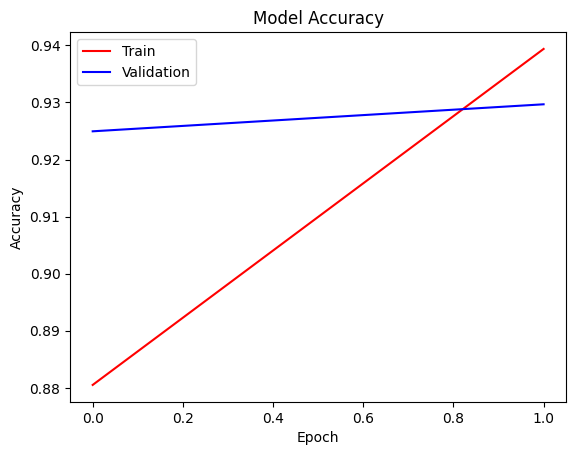

In [34]:
# Plot the accuracy
plt.plot(learner.history.history['accuracy'], 'r')
plt.plot(learner.history.history['val_accuracy'], 'b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("bert_acc.png")
plt.show()